

```
# This is formatted as code
```
# MSDA 3440 - Special Topics in Applied Natural Language
# Lab_Work: Autocorrect


<a name='0'></a>
## 0 - Overview

You use autocorrect every day on your cell phone and computer. In this assignment, you will explore what really goes on behind the scenes. Of course, the model you are about to implement is not identical to the one used in your phone, but it is still quite good.

By completing this assignment you will learn how to:

- Get a word count given a corpus
- Get a word probability in the corpus
- Manipulate strings
- Filter strings
- Implement Minimum edit distance to compare strings and to help find the optimal path for the edits.
- Understand how dynamic programming works


Similar systems are used everywhere.
- For example, if you type in the word **"I am lerningg"**, chances are very high that you meant to write **"learning"**, as shown in **Figure 1**.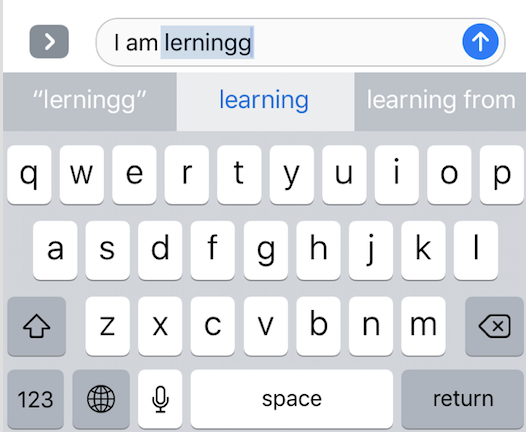

<a name='0-1'></a>
### 0.1 - Edit Distance

In this lab, you will implement models that correct words that are 1 and 2 edit distances away.
- We say two words are **n **edit distance away from each other when we need n edits to change one word into another.

An edit could consist of one of the following options:

- Delete (remove a letter): ‘hat’ => ‘at, ha, ht’
- Switch (swap 2 adjacent letters): ‘eta’ => ‘eat, tea,...’
- Replace (change 1 letter to another): ‘jat’ => ‘hat, rat, cat, mat, ...’
- Insert (add a letter): ‘te’ => ‘the, ten, ate, ...’

You will be using the four methods above to implement an Auto-correct.
- To do so, you will need to compute probabilities that a certain word is correct given an input.

This auto-correct you are about to implement was first created by [Peter Norvig](https://en.wikipedia.org/wiki/Peter_Norvig) in 2007.
- His [original article](https://norvig.com/spell-correct.html) may be a useful reference for this assignment.

The goal of our spell check model is to compute the following probability:

$$P(c|w) = \frac{P(w|c)\times P(c)}{P(w)} \tag{Eqn-1}$$

The equation above is [Bayes Rule](https://en.wikipedia.org/wiki/Bayes%27_theorem).
- Equation 1 says that the probability of a word being correct $P(c|w) $is equal to the probability of having a certain word $w$, given that it is correct $P(w|c)$, multiplied by the probability of being correct in general $P(C)$ divided by the probability of that word $w$ appearing $P(w)$ in general.
- To compute equation 1, you will first import a data set and then create all the probabilities that you need using that data set.

# New Section

```
# This is formatted as code
```

<a name='1'></a>
## 1 - Data Preprocessing

In [254]:
import re
from collections import Counter
import numpy as np
import pandas as pd

As in any other machine learning task, the first thing you have to do is process your data set.
- In the real world, when you build these NLP systems, you load the datasets and process them.
- So let's get some real world practice in pre-processing the data!

Your first task is to read in a file called **'shakespeare.txt'**

<a name='ex-1'></a>
### Part 1 - process_data
Implement the function `process_data` which

1) Reads in a corpus (text file)

2) Changes everything to lowercase

3) Returns a list of words.

In [255]:
def process_data(shakespeare):

    words = [] # return this variable correctly

    ### START CODE HERE ###
    with open(file_path, 'r', encoding='utf-8') as file:
        corpus = file.read()
    #Open the file, read its contents into a string variable

    # convert all letters to lower case
    corpus_lower = corpus.lower()
    #Convert every word to lower case and return them in a list.
    words = corpus_lower.split()
    ### END CODE HERE ###

    return words

file_path = 'shakespeare.txt'  
word_list = process_data(file_path)
print(word_list)

['o', 'for', 'a', 'muse', 'of', 'fire,', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention,', 'a', 'kingdom', 'for', 'a', 'stage,', 'princes', 'to', 'act', 'and', 'monarchs', 'to', 'behold', 'the', 'swelling', 'scene!', 'then', 'should', 'the', 'warlike', 'harry,', 'like', 'himself,', 'assume', 'the', 'port', 'of', 'mars;', 'and', 'at', 'his', 'heels,', "leash'd", 'in', 'like', 'hounds,', 'should', 'famine,', 'sword', 'and', 'fire', 'crouch', 'for', 'employment.', 'but', 'pardon,', 'and', 'gentles', 'all,', 'the', 'flat', 'unraised', 'spirits', 'that', 'have', 'dared', 'on', 'this', 'unworthy', 'scaffold', 'to', 'bring', 'forth', 'so', 'great', 'an', 'object:', 'can', 'this', 'cockpit', 'hold', 'the', 'vasty', 'fields', 'of', 'france?', 'or', 'may', 'we', 'cram', 'within', 'this', 'wooden', 'o', 'the', 'very', 'casques', 'that', 'did', 'affright', 'the', 'air', 'at', 'agincourt?', 'o,', 'pardon!', 'since', 'a', 'crooked', 'figure', 'may', 'attest', 'in', 'little

Note, in the following cell, 'words' is converted to a python `set`. This eliminates any duplicate entries.

In [256]:
#DO NOT MODIFY THIS CELL
word_l = process_data('shakespeare.txt')
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire,', 'that', 'would', 'ascend', 'the']
There are 9890 unique words in the vocabulary.


<a name='ex-2'></a>
### Part 2 - get_count

Implement a `get_count` function that returns a dictionary
- The dictionary's keys are words
- The value for each word is the number of times that word appears in the corpus.

For example, given the following sentence: **"I am happy because I am learning"**, your dictionary should return the following:
<table style="width:20%">

  <tr>
    <td> <b>Key </b>  </td>
    <td> <b>Value </b> </td>


  </tr>
  <tr>
    <td> I  </td>
    <td> 2</td>

  </tr>
   
  <tr>
    <td>am</td>
    <td>2</td>
  </tr>

  <tr>
    <td>happy</td>
    <td>1</td>
  </tr>
  
   <tr>
    <td>because</td>
    <td>1</td>
  </tr>
  
   <tr>
    <td>learning</td>
    <td>1</td>
  </tr>
</table>


**Instructions**:
Implement a `get_count` which returns a dictionary where the key is a word and the value is the number of times the word appears in the list.  


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Try implementing this using a for loop and a regular dictionary. This may be good practice for similar coding interview questions</li>
    <li>You can also use defaultdict instead of a regular dictionary, along with the for loop</li>
    <li>Otherwise, to skip using a `for` loop, you can use Python's <a href="https://docs.python.org/3.7/library/collections.html#collections.Counter" > Counter class</a> </li>
</ul>
</p>

In [209]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus.
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''

    word_count_dict = {}  # fill this with word counts
    ### START CODE HERE
    for word in word_l:
        if word in word_count_dict:
            word_count_dict[word]+=1
        else:
            word_count_dict[word]=1

    ### END CODE HERE ###
    return word_count_dict


In [257]:
#DO NOT MODIFY THIS CELL
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 9890 key values pairs
The count for the word 'thee' is 143


<a name='ex-3'></a>
### Part 3 - get_probs
Given the dictionary of word counts, compute the probability that each word will appear if randomly selected from the corpus of words.

$$P(w_i) = \frac{C(w_i)}{M} \tag{Eqn-2}$$
where

$C(w_i)$ is the total number of times $w_i$ appears in the corpus.

$M$ is the total number of words in the corpus.

For example, the probability of the word 'am' in the sentence **'I am happy because I am learning'** is:

$$P(am) = \frac{C(w_i)}{M} = \frac {2}{7} \tag{Eqn-3}.$$

**Instructions:** Implement `get_probs` function which gives you the probability
that a word occurs in a sample. This returns a dictionary where the keys are words, and the value for each word is its probability in the corpus of words.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
General advice
<ul>
    <li> Use dictionary.values() </li>
    <li> Use sum() </li>
    <li> The cardinality (number of words in the corpus should be equal to len(word_l).  You will calculate this same number, but using the word count dictionary.</li>
</ul>
    
If you're using a for loop:
<ul>
    <li> Use dictionary.keys() </li>
</ul>
    
If you're using a dictionary comprehension:
<ul>
    <li>Use dictionary.items() </li>
</ul>
</p>


In [258]:
def get_probs(word_count_dict):

    probs = {}  # return this variable correctly

    ### START CODE HERE ###

    # get the total count of words for all words in the dictionary
    total_count=sum(word_count_dict.values())

    # Calculate the probability of each word
    
    for word,count in word_count_dict.items():
        probs[word]=count/total_count

    ### END CODE HERE ###
    return probs


In [262]:
#DO NOT MODIFY THIS CELL
probs = get_probs(word_count_dict)
print(f"length of probs is {len(probs)}")
print(f"the probability of word 'thee' is {probs['thee']:.4f}")

length of probs is 9890
the probability of word 'thee' is 0.0027


<a name='2'></a>
## 2 - String Manipulations

Now that you have computed $P(w_i)$ for all the words in the corpus, you will write a few functions to manipulate strings so that you can edit the erroneous strings and return the right spellings of the words. In this section, you will implement four functions:

* `delete_letter`: given a word, it returns all the possible strings that have **one character removed**.
* `switch_letter`: given a word, it returns all the possible strings that have **two adjacent letters switched**.
* `replace_letter`: given a word, it returns all the possible strings that have **one character replaced by another different letter**.
* `insert_letter`: given a word, it returns all the possible strings that have an **additional character inserted**.


#### List comprehensions

String and list manipulation in python will often make use of a python feature called  [list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions). The routines below will be described as using list comprehensions, but if you would rather implement them in another way, you are free to do so as long as the result is the same. Further, the following section will provide detailed instructions on how to use list comprehensions and how to implement the desired functions. If you are a python expert, feel free to skip the python hints and move to implementing the routines directly.

<a name='ex-4'></a>
### Part 4 - delete_letter

**Instructions for delete_letter():** Implement a `delete_letter()` function that, given a word, returns a list of strings with one character deleted.

For example, given the word **nice**, it would return the set: {'ice', 'nce', 'nic', 'nie'}.
 
**Step 1:** Create a list of 'splits'. This is all the ways you can split a word into Left and Right: For example,   
'nice is split into : `[('', 'nice'), ('n', 'ice'), ('ni', 'ce'), ('nic', 'e'), ('nice', '')]`
This is common to all four functions (delete, replace, switch, insert).


**Step 2:** This is specific to `delete_letter`. Here, we are generating all words that result from deleting one character.  
This can be done in a single line with a list comprehension. You can make use of this type of syntax:  
`[f(a,b) for a, b in splits if condition]`  

For our 'nice' example you get:
['ice', 'nce', 'nie', 'nic']

In [266]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''

    delete_l = []
    split_l = []

    ### START CODE HERE ###
    split_l = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    delete_l = [L + R[1:] for L, R in split_l if R]
    ### END CODE HERE ###

    if verbose: print(f"input word {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return  delete_l


In [267]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's'), ('cans', '')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [223]:
print(f"Number of outputs of delete_letter('at') is {len(delete_letter('at'))}")

Number of outputs of delete_letter('at') is 2


<a name='ex-5'></a>
### Part 5 - switch_letter

**Instructions for switch_letter()**: Now implement a function that switches two letters in a word. It takes in a word and returns a list of all the possible switches of two letters **that are adjacent to each other**.
- For example, given the word 'eta', it returns {'eat', 'tea'}, but does not return 'ate'.

**Step 1:** is the same as in delete_letter()  
**Step 2:** A list comprehension or for loop which forms strings by swapping adjacent letters. This is of the form:  
`[f(L,R) for L, R in splits if condition]`  where 'condition' will test the length of R in a given iteration. See below.

In [241]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent character switched
    '''

    switch_l = []
    split_l = []

    # Convert word to a list of characters
    word_list = list(word)

    # Iterate through each character index except the last one
    for i in range(len(word_list) - 1):
        # Swap adjacent characters
        word_list[i], word_list[i + 1] = word_list[i + 1], word_list[i]
        # Append the modified word to the switch list
        switch_l.append(''.join(word_list))
        # Restore the original order for the next iteration
        word_list[i], word_list[i + 1] = word_list[i + 1], word_list[i]
    for i in range(len(word) + 1):
        split_l.append((word[:i], word[i:]))

    if verbose: 
        print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")

    return switch_l


In [268]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a'), ('eta', '')] 
switch_l = ['tea', 'eat']


In [269]:
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('at'))}")

Number of outputs of switch_letter('at') is 1


<a name='ex-6'></a>
### Part 6 - replace_letter
**Instructions for replace_letter()**: Now implement a function that takes in a word and returns a list of strings with one **replaced letter** from the original word.

**Step 1:** is the same as in `delete_letter()`

**Step 2:** A list comprehension or for loop which form strings by replacing letters.  This can be of the form:  
`[f(a,b,c) for a, b in splits if condition for c in string]`   Note the use of the second for loop.  
It is expected in this routine that one or more of the replacements will include the original word. For example, replacing the first letter of 'ear' with 'e' will return 'ear'.

**Step 3:** Remove the original input letter from the output.

In [244]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word 
     Output:
        replaces: a set of all possible strings where we replaced one letter from the original word. 
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    
    ### START CODE HERE ###
    split_l = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    replace_l = [L + c + R[1:] for L, R in split_l for c in letters if R for c in letters if c != R[0]]
    ### END CODE HERE ###

    replaces = replace_l

    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   

    return replaces


In [270]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n'), ('can', '')] 
replace_l ['aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'aan', 'ban', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan', 'aan', 'ban', 'dan', 'ean', 'fan

In [271]:
print(f"Number of outputs of replace_letter('at') is {len(replace_letter('at'))}")

Number of outputs of replace_letter('at') is 1300


<a name='ex-7'></a>
### Part 7 - insert_letter

**Instructions for insert_letter()**: Now implement a function that takes in a word and returns a list with a letter inserted at every offset.

**Step 1:** is the same as in `delete_letter()`

**Step 2:** This can be a list comprehension of the form:  
`[f(a,b,c) for a, b in splits if condition for c in string]`   

In [272]:
def insert_letter(word, verbose=False):

    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []

    ### START CODE HERE ###
    split_l = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    insert_l = [L + c + R for L, R in split_l for c in letters]
    ### END CODE HERE ###

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")

    return insert_l

In [273]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


<a name='3'></a>
## 3 - Combining the Edits

Now that you have implemented the string manipulations, you will create two functions that, given a string, will return all the possible single and double edits on that string. These will be `edit_one_letter()` and `edit_two_letters()`.

<a name='3-1'></a>
### 3.1 - Edit One Letter

<a name='ex-8'></a>
### Part 8 - edit_one_letter

**Instructions**: Implement the `edit_one_letter` function to get all the possible edits that are one edit away from a word. The edits  consist of the replace, insert, delete, and optionally the switch operation. You should use the previous functions you have already implemented to complete this function. The 'switch' function  is a less common edit function, so its use will be selected by an "allow_switches" input argument.

Note that those functions return *lists* while this function should return a *python set*. Utilizing a set eliminates any duplicate entries.

In [275]:
def edit_one_letter(word, allow_switches = True):

    edit_one_set = set()

    ### START CODE HERE ###
    
    edit_one_set.update(delete_letter(word))
    edit_one_set.update(insert_letter(word))
    edit_one_set.update(replace_letter(word))
    if allow_switches:
        edit_one_set.update(switch_letter(word))


    ### END CODE HERE ###

    # return this as a set and not a list
    return edit_one_set

In [276]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <class 'set'>
Number of outputs from edit_one_letter('at') is 129


<a name='3-2'></a>
### 3.2 - Edit Two Letters

<a name='ex-9'></a>
### Part 9 - edit_two_letters

Now you can generalize this to implement to get two edits on a word. To do so, you would have to get all the possible edits on a single word and then for each modified word, you would have to modify it again.

**Instructions**: Implement the `edit_two_letters` function that returns a set of words that are two edits away. Note that creating additional edits based on the `edit_one_letter` function may 'restore' some one_edits to zero or one edits. That is allowed here. This is accounted for in get_corrections.

In [280]:
def edit_two_letters(word, allow_switches=True):
   
    
    edit_two_set = set()
    
    ### START CODE HERE ###
    edit_one = edit_one_letter(word, allow_switches)
    for w in edit_one:
        if w:
            edit_two_set.update(edit_one_letter(w, allow_switches))
    ### END CODE HERE ###
    
    return edit_two_set


In [284]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object xshould be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object xshould be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


<a name='3-3'></a>
### 3.3 - Suggest Spelling Suggestions

Now you will use your `edit_two_letters` function to get a set of all the possible 2 edits on your word. You will then use those strings to get the most probable word you meant to type a.k.a your typing suggestion.

<a name='ex-10'></a>
### Exercise 10 - get_corrections
**Instructions**: Implement `get_corrections`, which returns a list of zero to n possible suggestion tuples of the form (word, probability_of_word).

**Step 1:** Generate suggestions for a supplied word: You'll use the edit functions you have developed. The 'suggestion algorithm' should follow this logic:
* If the word is in the vocabulary, suggest the word.
* Otherwise, if there are suggestions from `edit_one_letter` that are in the vocabulary, use those.
* Otherwise, if there are suggestions from `edit_two_letters` that are in the vocabulary, use those.
* Otherwise, suggest the input word.*  
* The idea is that words generated from fewer edits are more likely than words with more edits.


Note:
- Edits of two letters may 'restore' strings to either zero or one edit. This algorithm accounts for this by preferentially selecting lower distance edits first.

#### Short circuit
In Python, logical operations such as `and` and `or` have two useful properties. They can operate on lists and they have ['short-circuit' behavior](https://docs.python.org/3/library/stdtypes.html). Try these:

In [285]:
# example of logical operation on lists or sets
print( [] and ["a","b"] )
print( [] or ["a","b"] )
#example of Short circuit behavior
val1 =  ["Most","Likely"] or ["Less","so"] or ["least","of","all"]  # selects first, does not evalute remainder
print(val1)
val2 =  [] or [] or ["least","of","all"] # continues evaluation until there is a non-empty list
print(val2)

[]
['a', 'b']
['Most', 'Likely']
['least', 'of', 'all']


The logical `or` could be used to implement the suggestion algorithm very compactly. Alternately, if/elif/else constructs could be used.

**Step 2**: Create a 'best_words' dictionary where the 'key' is a suggestion and the 'value' is the probability of that word in your vocabulary. If the word is not in the vocabulary, assign it a probability of 0.

**Step 3**: Select the n best suggestions. There may be fewer than n.

In [286]:
def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    # Step 1: Generate suggestions
    if word in vocab:
        suggestions.append(word)
    else:
        suggestions.extend(edit_one_letter(word).intersection(vocab))
        if not suggestions:
            suggestions.extend(edit_two_letters(word).intersection(vocab))

    # Step 2: Determine probability of suggestions
    best_words = {word: probs[word] if word in probs else 0 for word in suggestions}

    # Step 3: Get the top n suggested words
    n_best = sorted(best_words.items(), key=lambda x: x[1], reverse=True)[:n]

    if verbose: 
        print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best



In [288]:
# Test your implementation - feel free to try other words in my word
my_word = 'hi'
tmp_corrections = get_corrections(my_word, probs, vocab, 2, verbose=True) # keep verbose=True
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

# CODE REVIEW COMMENT: using "tmp_corrections" insteads of "cors". "cors" is not defined
print(f"data type of corrections {type(tmp_corrections)}")

entered word =  hi 
suggestions =  ['i', 'hie', 'he', 'him', 'his', 'hid']
word 0: i, probability 0.021970
word 1: his, probability 0.008263
data type of corrections <class 'list'>


In [289]:
import w1_unittest


In [290]:
# Test your function
w1_unittest.test_get_corrections(get_corrections, probs, vocab)

<a name='4'></a>
## 4 - Minimum Edit Distance

Now that you have implemented your auto-correct, how do you evaluate the similarity between two strings? For example: 'waht' and 'what'

Also how do you efficiently find the shortest path to go from the word, 'waht' to the word 'what'?

You will implement a dynamic programming system that will tell you the minimum number of edits required to convert a string into another string.

<a name='4-1'></a>
### 4.1 - Dynamic Programming

Dynamic Programming breaks a problem down into subproblems which can be combined to form the final solution. Here, given a string source[0..i] and a string target[0..j], we will compute all the combinations of substrings[i, j] and calculate their edit distance. To do this efficiently, we will use a table to maintain the previously computed substrings and use those to calculate larger substrings.

You have to create a matrix and update each element in the matrix as follows:  

$$\text{Initialization}$$

\begin{align}
D[0,0] &= 0 \\
D[i,0] &= D[i-1,0] + del\_cost(source[i]) \tag{4}\\
D[0,j] &= D[0,j-1] + ins\_cost(target[j]) \\
\end{align}


$$\text{Per Cell Operations}$$
\begin{align}
 \\
D[i,j] =min
\begin{cases}
D[i-1,j] + del\_cost\\
D[i,j-1] + ins\_cost\\
D[i-1,j-1] + \left\{\begin{matrix}
rep\_cost; & if src[i]\neq tar[j]\\
0 ; & if src[i]=tar[j]
\end{matrix}\right.
\end{cases}
\tag{5}
\end{align}

So converting the source word **play** to the target word **stay**, using an input cost of one, a delete cost of 1, and replace cost of 2 would give you the following table:
<table style="width:20%">

  <tr>
    <td> <b> </b>  </td>
    <td> <b># </b>  </td>
    <td> <b>s </b>  </td>
    <td> <b>t </b> </td>
    <td> <b>a </b> </td>
    <td> <b>y </b> </td>
  </tr>
   <tr>
    <td> <b>  #  </b></td>
    <td> 0</td>
    <td> 1</td>
    <td> 2</td>
    <td> 3</td>
    <td> 4</td>

  </tr>
  <tr>
    <td> <b>  p  </b></td>
    <td> 1</td>
 <td> 2</td>
    <td> 3</td>
    <td> 4</td>
   <td> 5</td>
  </tr>
   
  <tr>
    <td> <b> l </b></td>
    <td>2</td>
    <td>3</td>
    <td>4</td>
    <td>5</td>
    <td>6</td>
  </tr>

  <tr>
    <td> <b> a </b></td>
    <td>3</td>
     <td>4</td>
     <td>5</td>
     <td>4</td>
     <td>5</td>
  </tr>
  
   <tr>
    <td> <b> y </b></td>
    <td>4</td>
      <td>5</td>
     <td>6</td>
     <td>5</td>
     <td>4</td>
  </tr>
  

</table>



The operations used in this algorithm are 'insert', 'delete', and 'replace'. These correspond to the functions that you defined earlier: insert_letter(), delete_letter() and replace_letter(). switch_letter() is not used here.

The diagram below describes how to initialize the table. Each entry in D[i,j] represents the minimum cost of converting string source[0:i] to string target[0:j]. The first column is initialized to represent the cumulative cost of deleting the source characters to convert string "EER" to "". The first row is initialized to represent the cumulative cost of inserting the target characters to convert from "" to "NEAR".

Filling in the remainder of the table utilizes the 'Per Cell Operations' in the equation (5) above. Note, the diagram below includes in the table some of the 3 sub-calculations shown in light grey. Only 'min' of those operations is stored in the table in the `min_edit_distance()` function.

Note that the formula for $D[i,j]$ shown in the image is equivalent to:

\begin{align}
 \\
D[i,j] =min
\begin{cases}
D[i-1,j] + del\_cost\\
D[i,j-1] + ins\_cost\\
D[i-1,j-1] + \left\{\begin{matrix}
rep\_cost; & if src[i]\neq tar[j]\\
0 ; & if src[i]=tar[j]
\end{matrix}\right.
\end{cases}
\tag{5}
\end{align}

The variable `sub_cost` (for substitution cost) is the same as `rep_cost`; replacement cost.  We will stick with the term "replace" whenever possible.

Below are some examples of cells where replacement is used. This also shows the minimum path from the lower right final position where "EER" has been replaced by "NEAR" back to the start. This provides a starting point for the optional 'backtrace' algorithm below.

<a name='ex-11'></a>
### Part 11 - min_edit_distance

Again, the word "substitution" appears in the figure, but think of this as "replacement".

**Instructions**: Implement the function below to get the minimum amount of edits required given a source string and a target string.

In [292]:
def min_edit_distance(source, target, ins_cost = 1, del_cost = 1, rep_cost = 2):
    '''
    Input:
        source: a string corresponding to the string you are starting with
        target: a string corresponding to the string you want to end with
        ins_cost: an integer setting the insert cost
        del_cost: an integer setting the delete cost
        rep_cost: an integer setting the replace cost
    Output:
        D: a matrix of len(source)+1 by len(target)+1 containing minimum edit distances
        med: the minimum edit distance (med) required to convert the source string to the target
    '''
    # use deletion and insert cost as  1
    m = len(source)
    n = len(target)
    #initialize cost matrix with zeros and dimensions (m+1,n+1)
    D = np.zeros((m+1, n+1), dtype=int)

    ### START CODE HERE (Replace instances of 'None' with your code) ###

    # Fill in column 0, from row 1 to row m, both inclusive
    for row in range(1,m+1): # Replace None with the proper range
        D[row,0] = row*del_cost

    # Fill in row 0, for all columns from 1 to n, both inclusive
    for col in range(1,n+1): # Replace None with the proper range
        D[0,col] = col*ins_cost

    # Loop through row 1 to row m, both inclusive
    for row in range(1,m+1):

        # Loop through column 1 to column n, both inclusive
        for col in range(1,n+1):

            # Intialize r_cost to the 'replace' cost that is passed into this function
            r_cost = rep_cost

            # Check to see if source character at the previous row
            # matches the target character at the previous column,
            if source[row-1] == target[col-1]:
                # Update the replacement cost to 0 if source and target are the same
                r_cost = 0

            # Update the cost at row, col based on previous entries in the cost matrix
            # Refer to the equation calculate for D[i,j] (the minimum of three calculated costs)
            D[row, col] = min(
                D[row-1, col] + del_cost,     # Deletion
                D[row, col-1] + ins_cost,     # Insertion
                D[row-1, col-1] + r_cost     # Replacement
            )

    # Set the minimum edit distance with the cost found at row m, column n
    med = None

    ### END CODE HERE ###
    return D, med

In [293]:
#DO NOT MODIFY THIS CELL
# testing your implementation
source =  'play'
target = 'stay'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list('#' + source)
cols = list('#' + target)
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  None 

   #  s  t  a  y
#  0  1  2  3  4
p  1  2  3  4  5
l  2  3  4  5  6
a  3  4  5  4  5
y  4  5  6  5  4


In [294]:
#DO NOT MODIFY THIS CELL
# testing your implementation
source =  'eer'
target = 'near'
matrix, min_edits = min_edit_distance(source, target)
print("minimum edits: ",min_edits, "\n")
idx = list(source)
idx.insert(0, '#')
cols = list(target)
cols.insert(0, '#')
df = pd.DataFrame(matrix, index=idx, columns= cols)
print(df)

minimum edits:  None 

   #  n  e  a  r
#  0  1  2  3  4
e  1  2  1  2  3
e  2  3  2  3  4
r  3  4  3  4  3


In [295]:
source = "eer"
targets = edit_one_letter(source,allow_switches = False)  #disable switches since min_edit_distance does not include them
for t in targets:
    _, min_edits = min_edit_distance(source, t,1,1,1)  # set ins, del, sub costs all to one
    if min_edits != 1: print(source, t, min_edits)

eer eetr None
eer keer None
eer eebr None
eer eed None
eer eek None
eer eier None
eer eerv None
eer etr None
eer eeir None
eer ezr None
eer ecr None
eer edr None
eer peer None
eer eker None
eer enr None
eer eor None
eer beer None
eer eejr None
eer exr None
eer eera None
eer ueer None
eer cer None
eer ser None
eer ceer None
eer eter None
eer eeru None
eer xer None
eer eers None
eer efer None
eer rer None
eer egr None
eer eerk None
eer eez None
eer eecr None
eer yeer None
eer eyer None
eer eere None
eer uer None
eer eber None
eer eerr None
eer eerl None
eer eeur None
eer eler None
eer epr None
eer esr None
eer eert None
eer emr None
eer eerp None
eer ebr None
eer ees None
eer eper None
eer eeu None
eer eefr None
eer eem None
eer veer None
eer ezer None
eer eeo None
eer feer None
eer qer None
eer ter None
eer ver None
eer ejer None
eer eerg None
eer eei None
eer ejr None
eer er None
eer wer None
eer eev None
eer eemr None
eer fer None
eer reer None
eer eerh None
eer ier None
eer ear None


In [296]:
source = "eer"
targets = edit_two_letters(source,allow_switches = False) #disable switches since min_edit_distance does not include them
for t in targets:
    _, min_edits = min_edit_distance(source, t,1,1,1)  # set ins, del, sub costs all to one
    if min_edits != 2 and min_edits != 1: print(source, t, min_edits)

eer eeurh None
eer eercy None
eer eum None
eer zceer None
eer nere None
eer perb None
eer dber None
eer ykeer None
eer yeerr None
eer ceev None
eer yaer None
eer vqeer None
eer ej None
eer eyro None
eer jger None
eer eerbb None
eer egerb None
eer eerae None
eer edv None
eer eeorc None
eer gkr None
eer eerej None
eer ejes None
eer eard None
eer teewr None
eer hpr None
eer tei None
eer vtr None
eer emerw None
eer eqek None
eer eiber None
eer zeir None
eer keier None
eer eedq None
eer eeirk None
eer eyrv None
eer edkr None
eer eernk None
eer eyfr None
eer eerzp None
eer tero None
eer eezkr None
eer ejrr None
eer rerj None
eer fedr None
eer ejl None
eer gur None
eer leerj None
eer jser None
eer eeris None
eer enrm None
eer eekz None
eer ieey None
eer veger None
eer exet None
eer eekh None
eer egery None
eer pelr None
eer eerky None
eer eeyg None
eer jeesr None
eer lneer None
eer ceeyr None
eer ejm None
eer yerx None
eer ueper None
eer ffeer None
eer ezew None
eer iver None
eer eertc None
e

# Submission
Please start working on this lab today, and the submission will be through Canvas. Upload it as a Jupyter Notebook file (.ipynb).

#### References
- Dan Jurafsky - Speech and Language Processing - Textbook
- This auto-correct explanation was first done by Peter Norvig in 2007